## Pengumpulan Data

## Import Required Libraries

In [49]:
# Import library pandas
import pandas as pd

# Import library numpy
import numpy as np

# Import library matplotlib untuk visualisasi
import matplotlib.pyplot as plt

# Import library untuk pembuatan model
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.models import Sequential

# Import library untuk pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

## Load Data

In [50]:
# Panggil file (load file bernama SAHAM - PT Telekomunikasi Indonesia Tbk (TLKM)) dan simpan dalam dataframe
data = pd.read_csv('/content/SAHAM - PT Telekomunikasi Indonesia Tbk (TLKM.JK) - Sheet1.csv')

# Tampilkan 5 baris data
data

,Date,Adj Close,Close,High,Low,Open,Volume
0,07/11/2019,3216.63,4070.0,4150.0,3990.0,4150.0,125.291.200
1,08/11/2019,3248.24,4110.0,4120.0,3990.0,4010.0,70.404.800
2,11/11/2019,3240.34,4100.0,4120.0,4040.0,4040.0,57.079.800
3,12/11/2019,3303.57,4180.0,4190.0,4050.0,4050.0,88.251.100
4,13/11/2019,3279.86,4150.0,4170.0,4100.0,4130.0,91.925.700
...,...,...,...,...,...,...,...
1207,31/10/2024,2820.00,2820.0,2870.0,2820.0,2860.0,139.590.300
1208,01/11/2024,2780.00,2780.0,2840.0,2760.0,2820.0,99.364.500
1209,04/11/2024,2800.00,2800.0,2810.0,2750.0,2780.0,63.112.300
1210,05/11/2024,2770.00,2770.0,2810.0,2730.0,2800.0,96.721.100


## Informasi Dataset

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1212 non-null   object 
 1   Adj Close  1212 non-null   float64
 2   Close      1212 non-null   float64
 3   High       1212 non-null   float64
 4   Low        1212 non-null   float64
 5   Open       1212 non-null   float64
 6   Volume     1212 non-null   object 
dtypes: float64(5), object(2)
memory usage: 66.4+ KB


In [52]:
# Kolom 'Close' yang akan kita gunakan dalam membangun model
# Slice kolom 'Close'
data_price = data.iloc[:,1:2].values

In [53]:
# Cek Output data_price
data_price

array([[3216.63],
       [3248.24],
       [3240.34],
       ...,
       [2800.  ],
       [2770.  ],
       [2740.  ]])

## Visualisasi Data

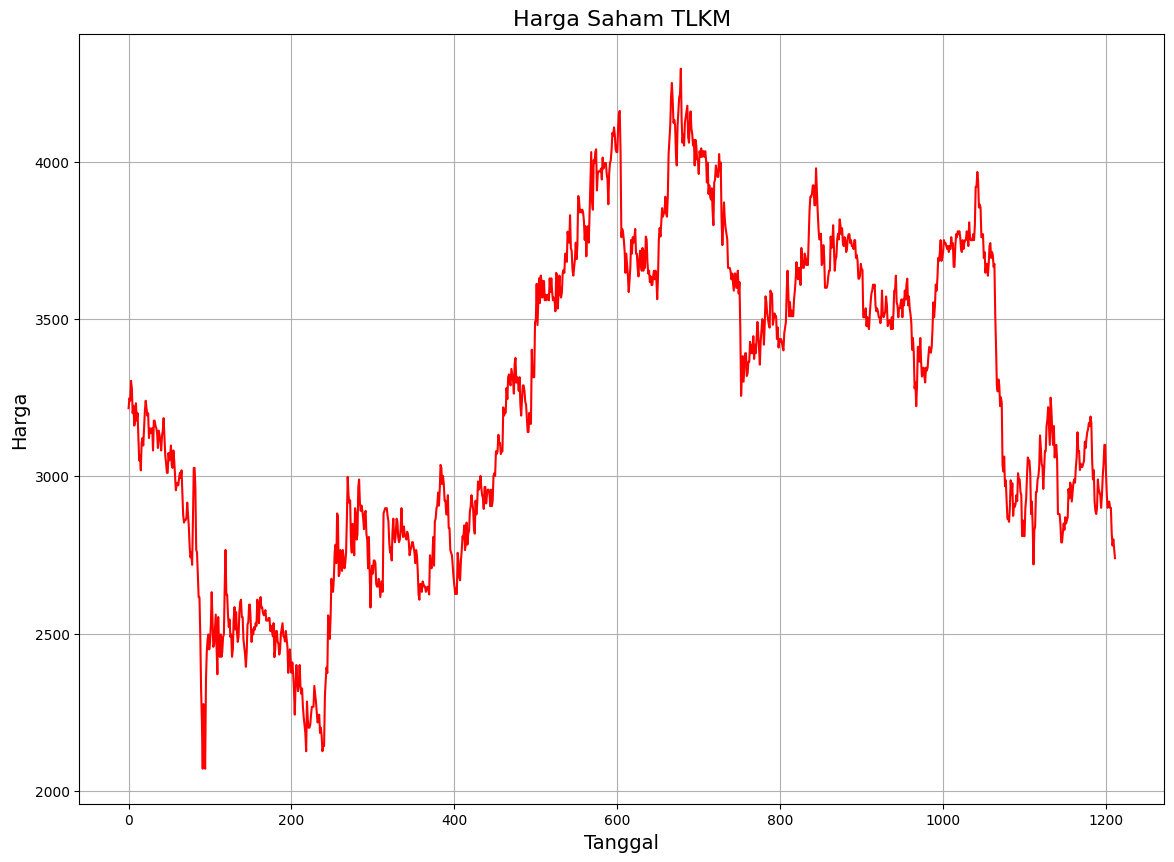

In [54]:
fig = plt.figure(figsize=(14,10))
plt.plot(data_price, c="red")
plt.title("Harga Saham TLKM", fontsize=16)
plt.xlabel("Tanggal", fontsize=14)
plt.ylabel("Harga", fontsize=14)
plt.grid()
plt.show()

## Pre-Processing

In [55]:
# Men-skalakan data antara 1 dan 0 (scaling) pada data_price
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
price_scaled = scaler.fit_transform(data_price)

In [57]:
# Definisikan Variabel Step dan Train
step_size = 21
train_x = []
train_y = []

In [58]:
# Membuat Fitur dan List Label
for i in range(step_size, 1212):
  train_x.append(price_scaled[i-step_size:i, 0])
  train_y.append(price_scaled[i, 0])

In [59]:
price_scaled

array([[0.51503344],
       [0.52923992],
       [0.52568943],
       ...,
       [0.32778737],
       [0.31430446],
       [0.30082156]])

In [60]:
# Mengonversikan List yang Telah Dibuat Sebelumnya Ke Array
train_x = np.array(train_x)
train_y = np.array(train_y)

In [61]:
# Cek Dimensi Data dengan Function .shape
print("Dimensi dari variabel bebas adalah: ", train_x.shape)
print("Dimensi dari variabel terikat adalah: ", train_y.shape)

Dimensi dari variabel bebas adalah:  (1191, 21)
Dimensi dari variabel terikat adalah:  (1191,)


In [62]:
# 238 hari terakhir akan digunakan sebagai pengujian
# 953 hari pertama akan digunakan sebagai pelatihan

test_x = train_x[953:]
train_x = train_x[:953]
test_y = train_y[953:]
train_y = train_y[:953]

In [63]:
# Reshape data untuk dimasukkan kedalam keras model
train_x = np.reshape(train_x, (953, step_size, 1))
test_x = np.reshape(test_x, (238, step_size, 1))

In [64]:
# Check kembali dimensi data yang telah di reshape dengan function .shape
print(train_x.shape)
print(test_x.shape)

(953, 21, 1)
(238, 21, 1)


## Build Model - LSTM

In [65]:
# Buat Variabel Penampung Model LSTM
lstm_model = Sequential()

In [66]:
# Add a LSTM layer with BatchNormalization and Dropout
lstm_model.add(LSTM(64, activation="tanh", return_sequences=True, input_shape=(train_x.shape[1], 1)))
lstm_model.add(Dropout(0.30))
lstm_model.add(BatchNormalization())

lstm_model.add(LSTM(64, activation="tanh", return_sequences=True))
lstm_model.add(Dropout(0.30))

lstm_model.add(LSTM(64, activation="tanh", return_sequences=False))
lstm_model.add(Dropout(0.30))

# Add a Dense layer with 1 unit
lstm_model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
# menambahkan loss function kedalam model lstm dengan tipe MSE

lstm_model.compile(
    optimizer="adam",
    loss="MSE"
)

In [68]:
lstm_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 21, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 21, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 21, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,265 (325.25 KB)

 Trainable params: 83,137 (324.75 KB)

 Non-trainable params: 128 (512.00 B)

In [69]:
# fit lstm model, dengan epoch 100 dan batch size 32
lstm_model.fit(train_x,train_y,epochs=100,batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0842
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0201
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0113
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0091
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0090
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0080
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0096
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0089
Epoch 13/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0065
Epoch 14/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0073
Epoch 15/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - lo

In [70]:
# Prediksi Model LSTM
lstm_predictions = lstm_model.predict(test_x)

# Check Evaluasi
lstm_score_1 = mean_absolute_percentage_error(test_y, lstm_predictions)
lstm_score_2 = mean_squared_error(test_y, lstm_predictions)
lstm_score_3 = mean_absolute_error(test_y, lstm_predictions)

print("Mean Absolute Percentage Error (MAPE): ", lstm_score_1)
print("Mean Squared Error (MSE): ", lstm_score_2)
print("Mean Absolute Error (MAE): ", lstm_score_3)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Mean Absolute Percentage Error (MAPE):  0.06034222511220195
Mean Squared Error (MSE):  0.0013204899957328594
Mean Absolute Error (MAE):  0.030032478752586612


## Visualisasi Hasil Prediksi dengan Data Original

In [71]:
lstm_predictions = scaler.inverse_transform(lstm_predictions)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

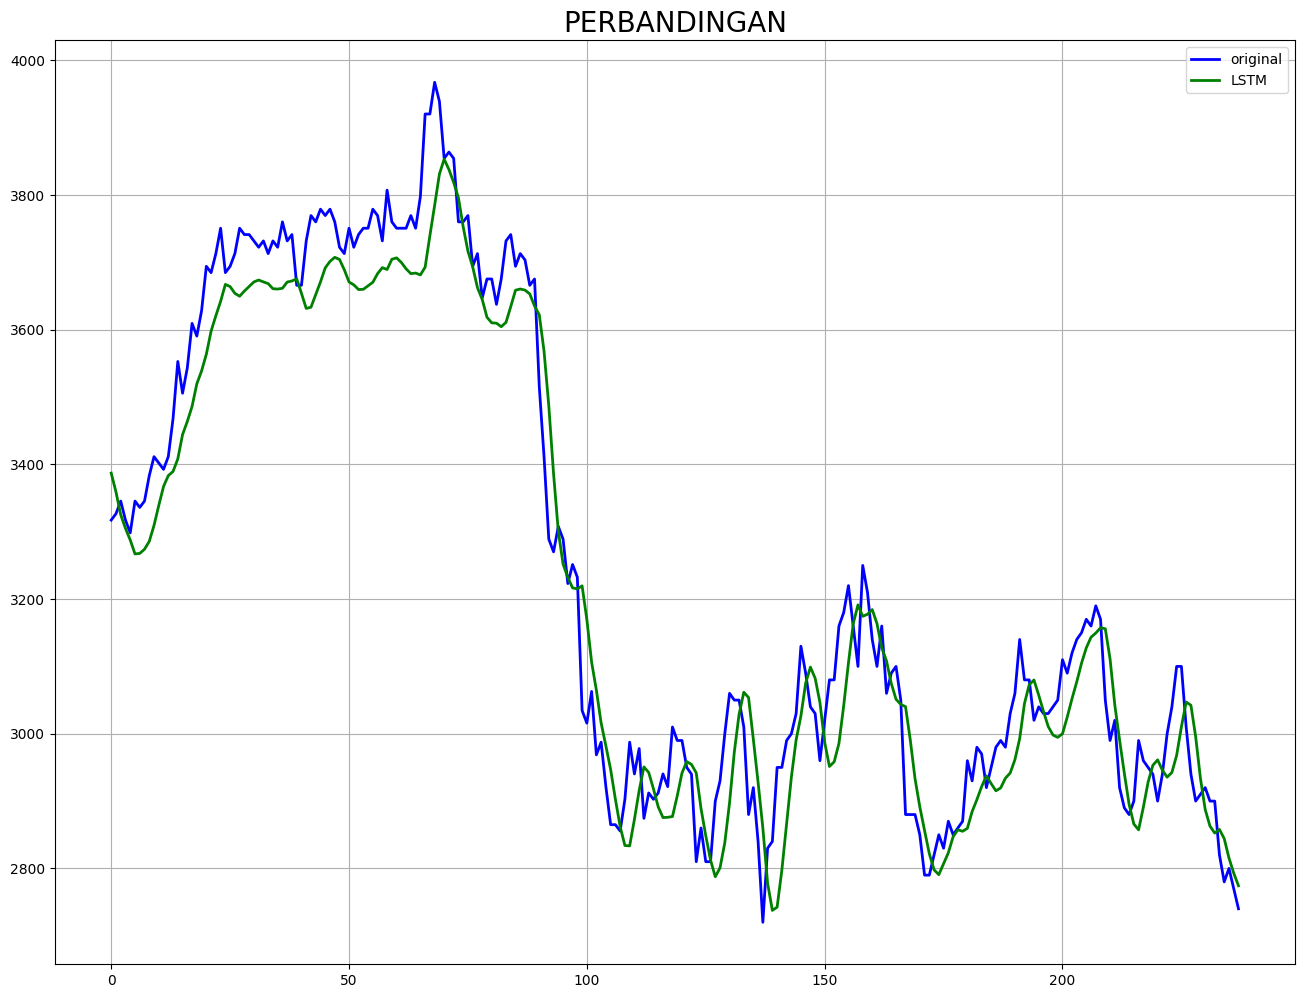

In [72]:
plt.figure(figsize=(16,12))

plt.plot(test_y, c="blue",linewidth=  2, label="original")
plt.plot(lstm_predictions, c="green",linewidth=2, label="LSTM")
plt.legend()
plt.title("PERBANDINGAN",fontsize=20)
plt.grid()
plt.show()